## Importando bibliotecas úteis

In [46]:
import numpy as np

import obspy as op
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from glob import glob

import matplotlib.pyplot as plt

import cartopy as cp

import pandas as pd

## Coletando dados das estações através dos arquivos StationXML 

Para mais informações: https://docs.obspy.org/packages/obspy.core.inventory.html

### Buscando e lendo arquivos XML

In [2]:
xml_files = glob("XML/*")
xml_files

['XML/BL.CNLB.nmx.dataless.xml',
 'XML/BL.ITAB.nmx.dataless.xml',
 'XML/BL.ITQB.dataless.xml',
 'XML/BL.CPSB.nmx.dataless.xml',
 'XML/BL.PLTB.nmx.dataless.xml']

In [3]:
root = !pwd
root = root[0]

### Coletando as informações sobre as estações e salvando em um dicionário:

In [40]:
stations_dic = {'network':[],'station':[],'longitude':[],'latitude':[],'elevation':[],'start_date':[]}
for i in xml_files:
    print(root+i)
    inv = op.read_inventory(path_or_file_object=i)
    net = inv[0]
    sta = inv[0][0]
    
    stations_dic['network'].append(net.code)
    stations_dic['station'].append(sta.code)
    stations_dic['longitude'].append(sta.longitude)
    stations_dic['latitude'].append(sta.latitude)
    stations_dic['elevation'].append(sta.elevation)
    stations_dic['start_date'].append(sta.start_date)

/home/diogoloc/diogogit/codes_escritos/workflow_notebooks/Ingrid_HerzogXML/BL.CNLB.nmx.dataless.xml
/home/diogoloc/diogogit/codes_escritos/workflow_notebooks/Ingrid_HerzogXML/BL.ITAB.nmx.dataless.xml
/home/diogoloc/diogogit/codes_escritos/workflow_notebooks/Ingrid_HerzogXML/BL.ITQB.dataless.xml
/home/diogoloc/diogogit/codes_escritos/workflow_notebooks/Ingrid_HerzogXML/BL.CPSB.nmx.dataless.xml
/home/diogoloc/diogogit/codes_escritos/workflow_notebooks/Ingrid_HerzogXML/BL.PLTB.nmx.dataless.xml


In [41]:
stations_dic

{'network': ['BL', 'BL', 'BL', 'BL', 'BL'],
 'station': ['CNLB', 'ITAB', 'ITQB', 'CPSB', 'PLTB'],
 'longitude': [-50.8533, -52.1313, -56.6275, -53.4432, -53.60445],
 'latitude': [-29.3148, -27.2349, -29.6638, -30.4123, -31.76367],
 'elevation': [712.0, 459.0, 95.0, 290.0, 412.0],
 'start_date': [2011-04-01T00:00:00.000000Z,
  2002-10-14T00:00:00.000000Z,
  2013-12-06T00:00:00.000000Z,
  2011-05-05T00:00:00.000000Z,
  2011-04-18T00:00:00.000000Z]}

### Transformando o dicionário em um dataframe do PANDAS:

In [42]:
df_stations = pd.DataFrame.from_dict(stations_dic)
df_stations

,network,station,longitude,latitude,elevation,start_date
0,BL,CNLB,-50.85330,-29.31480,712.0,2011-04-01T00:00:00.000000Z
1,BL,ITAB,-52.13130,-27.23490,459.0,2002-10-14T00:00:00.000000Z
2,BL,ITQB,-56.62750,-29.66380,95.0,2013-12-06T00:00:00.000000Z
3,BL,CPSB,-53.44320,-30.41230,290.0,2011-05-05T00:00:00.000000Z
4,BL,PLTB,-53.60445,-31.76367,412.0,2011-04-18T00:00:00.000000Z


## Obtendo os dados dos eventos

In [72]:
starttime = UTCDateTime("2011-01-01")
endtime = UTCDateTime("2022-12-20")

client = Client("IRIS")


cat = client.get_events(starttime=starttime, endtime=endtime,latitude=-29.31480,longitude=-50.85330,minradius=30,maxradius=90,minmagnitude=5)
fig = inv.plot(show=False)  
cat.plot(fig=fig)  

FDSNException: Unknown Error (timeout): timed out

/home/diogoloc/programs/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/diogoloc/programs/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/diogoloc/programs/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/diogoloc

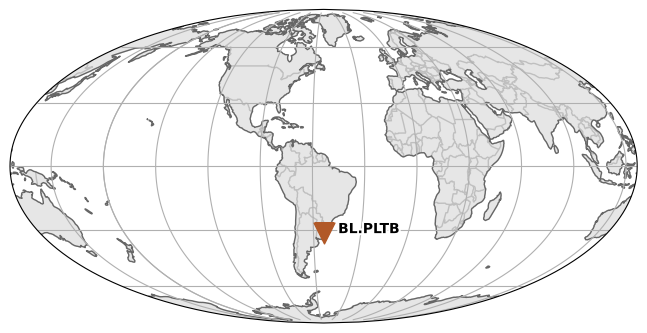

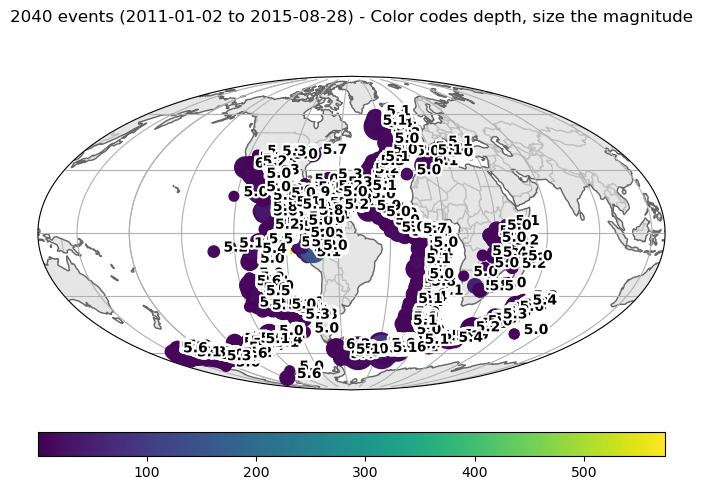

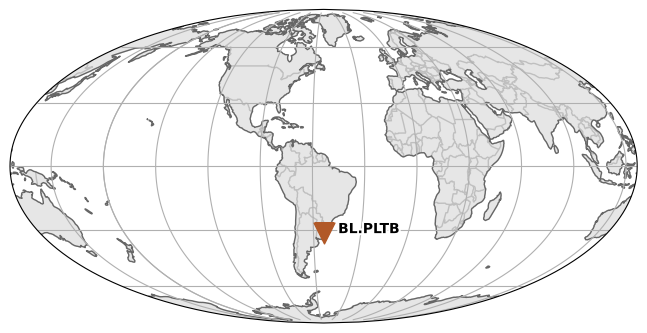

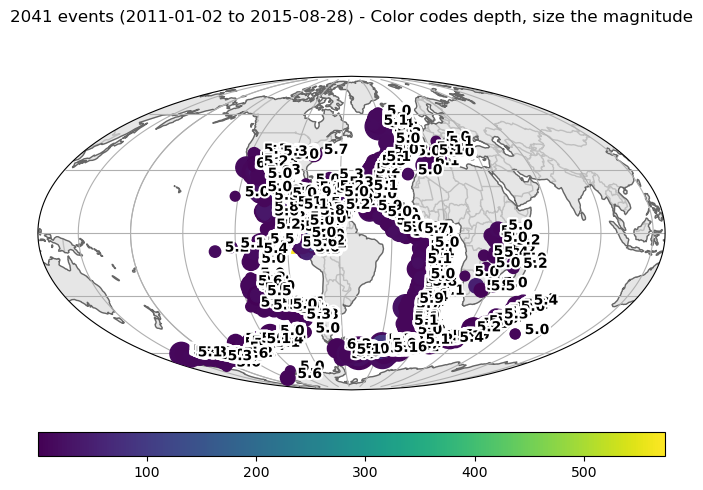

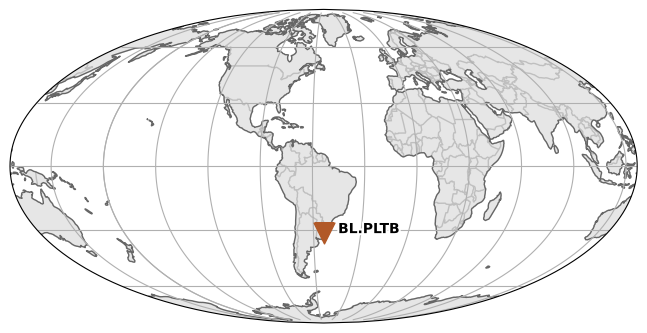

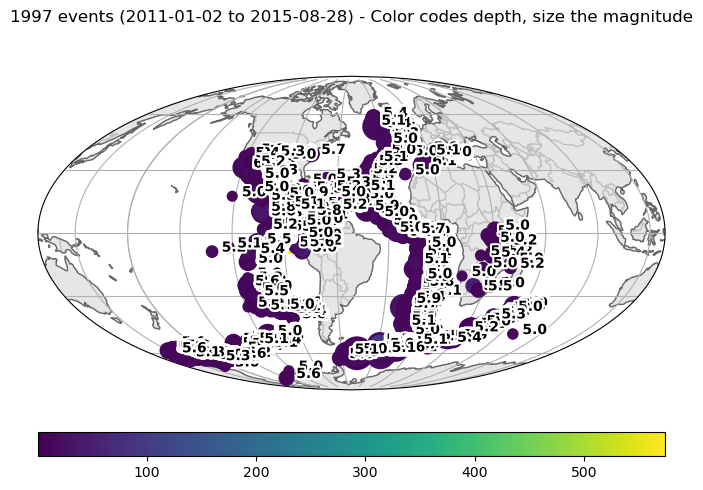

KeyboardInterrupt: 

In [67]:
for index, row in df_stations.iterrows():
  
    cat = client.get_events(starttime=starttime, endtime=endtime,latitude=row['latitude'],longitude=row['longitude'],minradius=30,maxradius=90,minmagnitude=5)
    fig = inv.plot(show=False)  
    cat.plot(fig=fig) 